To run the file ensure that the dataset is in /content directory and then go to Runtime> Run All, finally enter the date to ge the predicted price for 2 years extended.

In [60]:
import pandas as pd
import numpy as np

In [61]:
df=pd.read_csv("/content/Nat_Gas.csv")

In [62]:
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [63]:
df['Dates'] = pd.to_datetime(df['Dates'])

<ipython-input-63-4454d6f9169b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [64]:
df = df.sort_values(by='Dates')

In [65]:
df

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


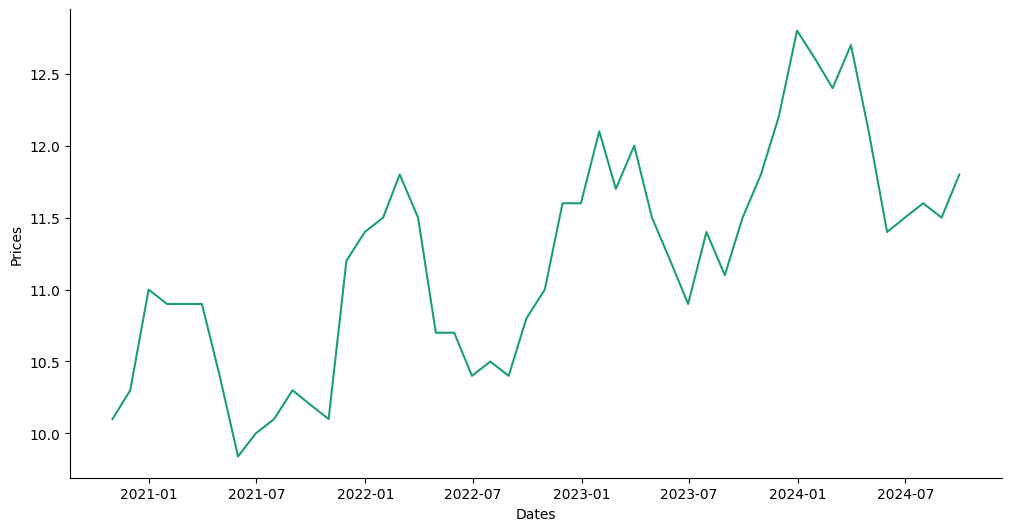

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Prices']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Prices')

The above graph can be used to get the information that prices rise at the start of the year and go down comparatively at the end of the year in winters and this is a constant trend which is observed across the years, so we can predict that the prices will increase in jan 2025 and will gradualy decrase coparatively at the end of the year.

In [67]:
df_log = np.log(df['Prices'])

<Axes: >

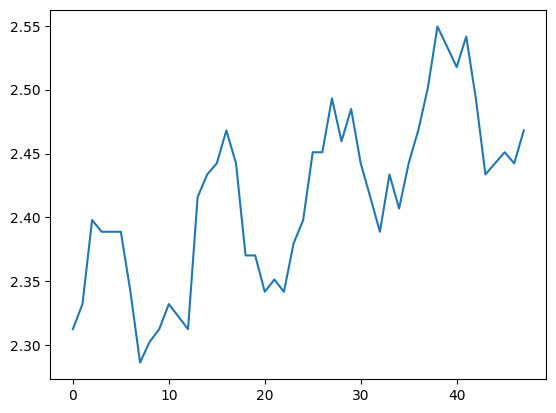

In [68]:
df_log.plot()

In [69]:
df_sorted = df.sort_values('Dates')
new_df= df['Prices']
split_ratio = 0.8
split_index = int(split_ratio * len(new_df))
train_data = new_df.iloc[:split_index]
test_data = new_df.iloc[split_index:]

##ACF Plot and PACF Plot

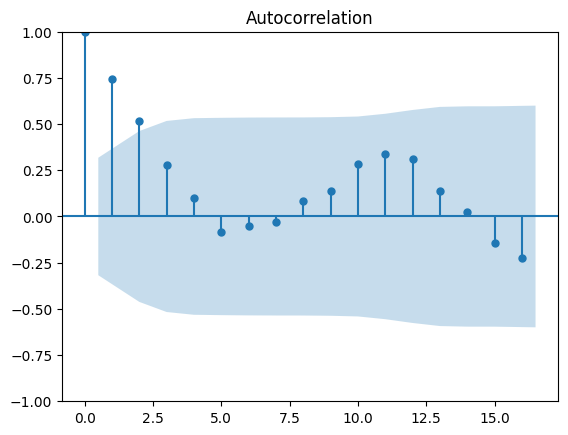

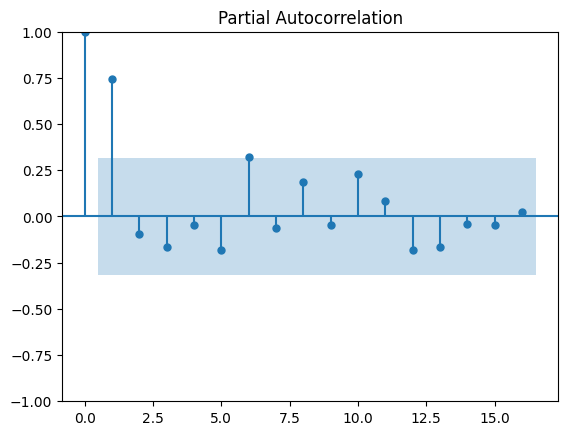

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_data)
pacf_original=plot_pacf(train_data)

##ADF Test

In [71]:
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(train_data)
print(f'p-value: {adf_test[1]}')

p-value: 0.9877510602375901


#Transforming to stationary series

<Axes: >

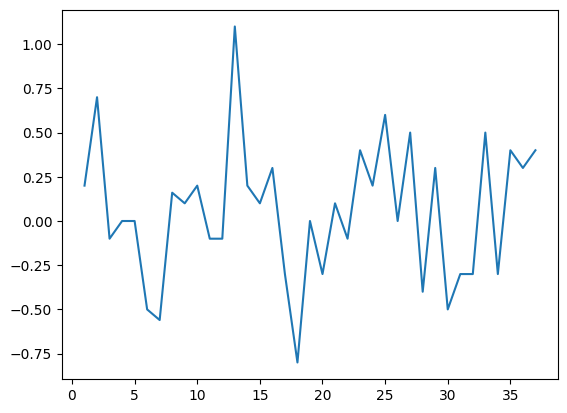

In [72]:
train_data_diff=train_data.diff().dropna()
train_data_diff.plot()

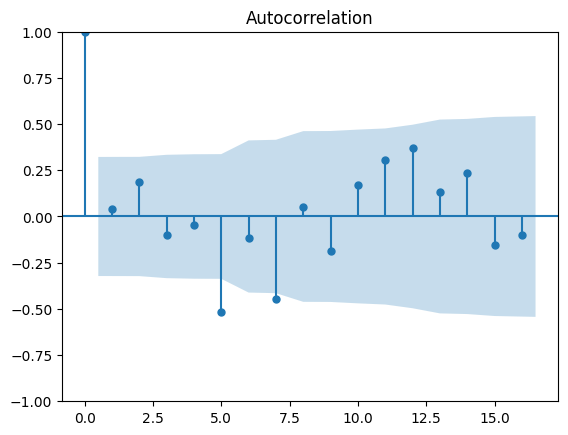

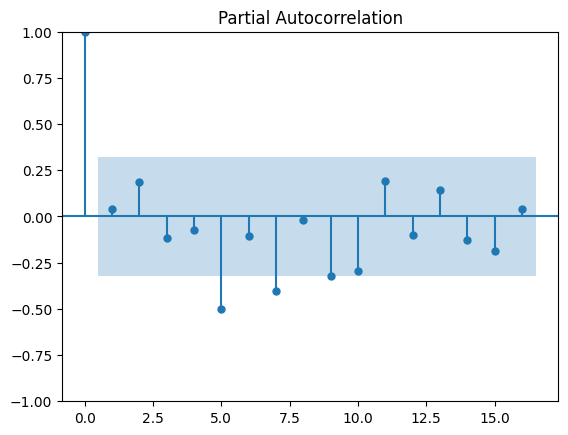

In [73]:
acf_diff=plot_acf(train_data_diff)
pacf_diff= plot_pacf(train_data_diff)

In [86]:
adf_test_diff= adfuller(train_data_diff)
print("p-value:",adf_test_diff[1])

p-value: 3.90831224677903e-06


This suggests that the first difference time series is stationary

##Determine ARIMA's parameters p,q

In [87]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train_data, order=(2,1,0))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                   38
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -16.873
Date:                Tue, 07 May 2024   AIC                             39.745
Time:                        17:32:08   BIC                             44.578
Sample:                             0   HQIC                            41.449
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0524      0.212      0.248      0.804      -0.363       0.467
ar.L2          0.2063      0.235      0.878      0.380      -0.254       0.667
sigma2         0.1454      0.031      4.759      0.0

##Making predictions

checking for the residual plots for making sure the residuals are random and the data is normally distributed

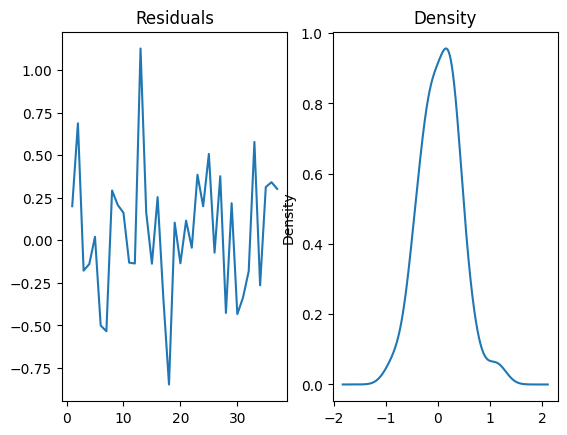

In [88]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

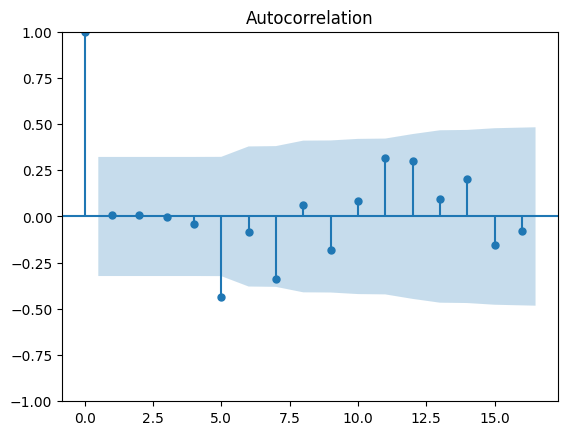

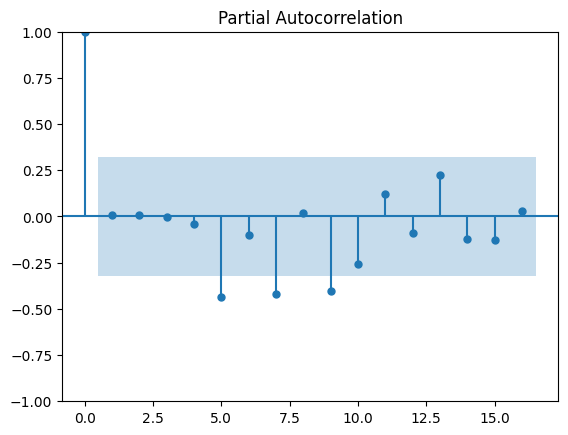

In [89]:
afc_res= plot_acf(residuals)
pacf_res= plot_pacf(residuals)

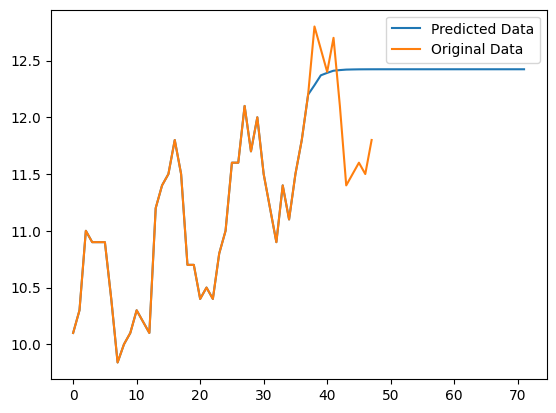

In [91]:
forecast_test = model_fit.forecast(len(test_data))
forecast_test_extended = model_fit.forecast(len(test_data)+24)
forecast_test_df=pd.DataFrame(forecast_test_extended)
df_pred=pd.concat([train_data,forecast_test_extended])
df_prev= new_df
df_pred.plot(label='Predicted Data')
df_prev.plot(label='Original Data')
plt.legend()

In [92]:
#original
new_df

0     10.10
1     10.30
2     11.00
3     10.90
4     10.90
5     10.90
6     10.40
7      9.84
8     10.00
9     10.10
10    10.30
11    10.20
12    10.10
13    11.20
14    11.40
15    11.50
16    11.80
17    11.50
18    10.70
19    10.70
20    10.40
21    10.50
22    10.40
23    10.80
24    11.00
25    11.60
26    11.60
27    12.10
28    11.70
29    12.00
30    11.50
31    11.20
32    10.90
33    11.40
34    11.10
35    11.50
36    11.80
37    12.20
38    12.80
39    12.60
40    12.40
41    12.70
42    12.10
43    11.40
44    11.50
45    11.60
46    11.50
47    11.80
Name: Prices, dtype: float64

##Autofitting ARIMA


In [93]:
%pip install pmdarima
import pmdarima as pm

In [94]:
auto_arima = pm.auto_arima(train_data , stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(4, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [95]:

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(4, 1, 1)   Log Likelihood                  -8.851
Date:                Tue, 07 May 2024   AIC                             31.703
Time:                        17:34:16   BIC                             42.979
Sample:                             0   HQIC                            35.678
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0300      0.011      2.615      0.009       0.008       0.052
ar.L1          0.6073      0.211      2.877      0.004       0.194       1.021
ar.L2          0.2623      0.256      1.026      0.305      -0.239       0.763
ar.L3         -0.2374      0.290     -0.820      0.412      -0.805       0.330
ar.L4         -0.3180      0.188     -1.695      0.090      -0.686       0.050
ma.L1         -0.9895      2.353     -0.420      0.674      -5.602       3.623
sigma2         0.0839      0.198      0.424      0.671      -0.303       0.471
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.29   Prob(JB):                         0.73
Heteroskedasticity (H):               0.76   Skew:                             0.31
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

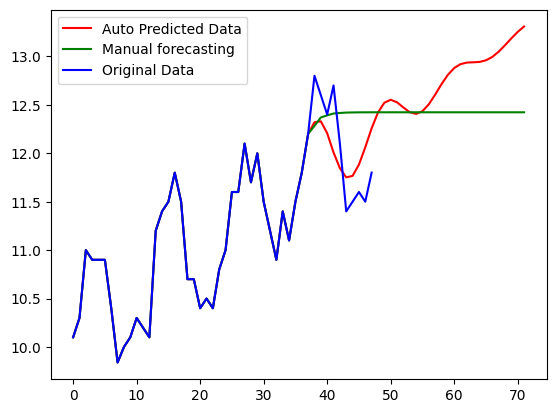

In [105]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))
forecast_test_auto_extended = auto_arima.predict(n_periods=len(test_data)+24)
forecast_test_auto_df=pd.DataFrame(forecast_test_auto_extended)
df_pred=pd.concat([train_data,forecast_test_auto_df])
df_pred_old=pd.concat([train_data,forecast_test_extended])
df_prev= new_df

df_pred.plot(label='Predicted Data',color='red')
df_pred_old.plot(label='Manual forecasting',color='green')
df_prev.plot(label='Original Data', color='blue')

plt.legend(['Auto Predicted Data','Manual forecasting', 'Original Data'])

In [98]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast_test)
mape = mean_absolute_percentage_error(test_data, forecast_test)
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.5671065540564613
mape - manual: 0.048180926208587854
rmse - manual: 0.6564695607770544


In [99]:
mae = mean_absolute_error(test_data, forecast_test_auto)
mape = mean_absolute_percentage_error(test_data, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_data, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.3808097503392894
mape - auto: 0.031590072212916306
rmse - auto: 0.41012222045766017


In [106]:
df_pred


,0
0,10.100000
1,10.300000
2,11.000000
3,10.900000
4,10.900000
...,...
67,13.048410
68,13.115136
69,13.186166
70,13.252820


In [110]:
timestamps = pd.date_range(start='2020-09-30', periods=len(df_pred), freq='M')
df_pred.index = timestamps
df_pred

,0
2020-09-30,10.100000
2020-10-31,10.300000
2020-11-30,11.000000
2020-12-31,10.900000
2021-01-31,10.900000
...,...
2026-04-30,13.048410
2026-05-31,13.115136
2026-06-30,13.186166
2026-07-31,13.252820


In [111]:
def get_price_for_date(date):
    try:
        # Convert input date string to datetime
        date = pd.to_datetime(date)
        # Retrieve price for the given date from df_pred
        price = df_pred.loc[date]
        return price.iloc[0]  # Retrieve the first value in the Series (the price)
    except KeyError:
        return "Price not available for the given date."

date_input = input("Enter a date in between (2020-09-31 and 2026-08-31) in the format (YYYY-MM-DD): ")
result = get_price_for_date(date_input)
print("Price on", date_input, ": $", result)

Enter a date in between (2020-09-31 and 2026-08-31) in the format (YYYY-MM-DD): 2025-06-30
Price on 2025-06-30 : $ 12.604993940514586
